# **Project Title: Analyzing Factors for Classifying High vs. Standard Priced Apparel**


### **Name:** Sejal Patil  
### **Roll No:** 240516  
### **Section:** CSE IV  
### **Course Name:** Data Analytics Using Python  


<br><br><br>

## **Step 1: Problem Definition & Dataset Selection**

### Project Description:
This project presents a complete data analytics workflow for product classification using the "Clothes Price Prediction" dataset. Recognizing the non-linear relationship between product features and price, the problem was framed as a binary classification task. A key step was the feature engineering of a new target variable, 'Price_Category', by labeling items as 'high' or 'standard' based on the median price. Exploratory Data Analysis was then performed to uncover patterns associated with these new categories. The statistical significance of these associations, particularly between product category and price level, was validated using One-Way ANOVA test. Finally, a Logistic Regression model was trained and rigorously evaluated using a confusion matrix, accuracy, precision, and recall to assess its performance in correctly classifying clothing items.erce pricing strategies.

[Dataset-Source-Link](https://www.kaggle.com/datasets/mrsimple07/clothes-price-prediction)


## **Objective**: 
Classifying clothing items into 'high priced' or 'standard priced' categories based on their features using Logistic Regression.

In [3]:
#importing all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor 
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [4]:
data=pd.read_csv('clothes_price_prediction_data.csv')

In [5]:
data.shape

(1000, 6)

In [6]:
data.head(5)

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [7]:
data.describe()

,Price
count,1000.000000
mean,106.289000
std,53.695444
min,10.000000
25%,59.750000
50%,108.000000
75%,150.000000
max,199.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [9]:
numerical_data = data.select_dtypes(include=['int64', 'float64'])

skewness_values = numerical_data.skew()
kurtosis_values = numerical_data.kurtosis()
print(skewness_values) #the skewness and kurtosis of the price data
print(kurtosis_values)

Price   -0.071129
dtype: float64
Price   -1.119533
dtype: float64



*   **Symmetry:** The prices are evenly balanced around the average.
*   **Outliers:** The data is less prone to extreme price points (both very high and very low).

In [10]:
display(data.Size.value_counts())
display(data.Category.value_counts())
display(data.Color.value_counts())
display(data.Size.value_counts())
display(data.Material.value_counts())

#The value counts for all categorical features reveal a perfectly balanced dataset

Size
XS     196
XXL    173
XL     167
S      166
M      157
L      141
Name: count, dtype: int64

Category
Jacket     191
Shoes      172
Jeans      167
Dress      166
Sweater    160
T-shirt    144
Name: count, dtype: int64

Color
Yellow    173
White     171
Red       168
Black     163
Blue      163
Green     162
Name: count, dtype: int64

Size
XS     196
XXL    173
XL     167
S      166
M      157
L      141
Name: count, dtype: int64

Material
Polyester    175
Silk         173
Wool         172
Denim        163
Cotton       162
Nylon        155
Name: count, dtype: int64

### Types of Variable: 

**Categorical-**

Brand: Nominal  
Category: Nominal    
Color: Nominal  
Size: Ordinal  
Material: Nominal 

**Numerical-**  

Price: Ratio (has a true zero)

<br><br><br>


## **Step 2: Data Cleaning & Preparation**

In [11]:
df = data.copy()

In [12]:
#checking for null values if any
df.isnull().sum()

Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64

In [13]:
# Handling missing values(the data is clean but just to show how it's done)
df.fillna(df.mean(numeric_only=True), inplace=True) # filling mean for numerical values
df['Category'].fillna(df['Category'].mode()[0], inplace=True) #filling mode for categorical values

In [14]:
# Counting the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [15]:
#dropping any duplicates as duplicate rows can skew our analysis and give undue weight to certain data points.
df.drop_duplicates(inplace=True)

In [16]:
# Handling Outliers

#This technique preserves our data points while mitigating the negative influence of extreme values on the model's training process.


Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to keep only the values within the boundaries
df_cleaned = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(f"\nShape of DataFrame before outlier removal: {df.shape}")
print(f"Shape of DataFrame after outlier removal: {df_cleaned.shape}")
print(f"Removed {df.shape[0] - df_cleaned.shape[0]} outliers.")


Shape of DataFrame before outlier removal: (1000, 6)
Shape of DataFrame after outlier removal: (1000, 6)
Removed 0 outliers.


In [17]:
# Categorical encoding wiht LabelEncoder

# Identify the categorical columns that need to be converted to a numerical format.
categorical_cols = ['Brand', 'Category', 'Color', 'Size', 'Material']

# Use pandas.get_dummies() to perform One-Hot Encoding.
# This is the correct and standard method for this task.
# `drop_first=True` is used to avoid multicollinearity, a statistical issue that can harm linear models.
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)


# Linear regression requires all input features to be numerical. 
# One-Hot Encoding is the appropriate method for nominal categorical data (like Brand, Color) as it creates
# binarycolumns for each category without implying a false order or ranking.

print("Shape of the dataframe after One-Hot Encoding:", df_encoded.shape)

df_encoded.head()

Shape of the dataframe after One-Hot Encoding: (1000, 26)


,Price,Brand_New Balance,Brand_Nike,Brand_Puma,Brand_Reebok,Brand_Under Armour,Category_Jacket,Category_Jeans,Category_Shoes,Category_Sweater,...,Size_M,Size_S,Size_XL,Size_XS,Size_XXL,Material_Denim,Material_Nylon,Material_Polyester,Material_Silk,Material_Wool
0,182,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,57,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,127,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,77,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,113,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


<br><br><br>

##  **Step 3: Exploratory Data Analysis (EDA)**

### A. Univariate Analysis (Analyzing Single Variables)

In [18]:
# .describe() provides key metrics like mean, median, std, and quartiles.
# .to_frame().T is used for a cleaner presentation format.
display(df.Price.describe().to_frame().T)




,count,mean,std,min,25%,50%,75%,max
Price,1000.0,106.289,53.695444,10.0,59.75,108.0,150.0,199.0


Inference: The descriptive statistics show that the average price (mean) of clothing is approximately 106.29 and median is 108.0.  
A high standard deviation 53 shows the data is widely spread out and not tightly clustered around the center.

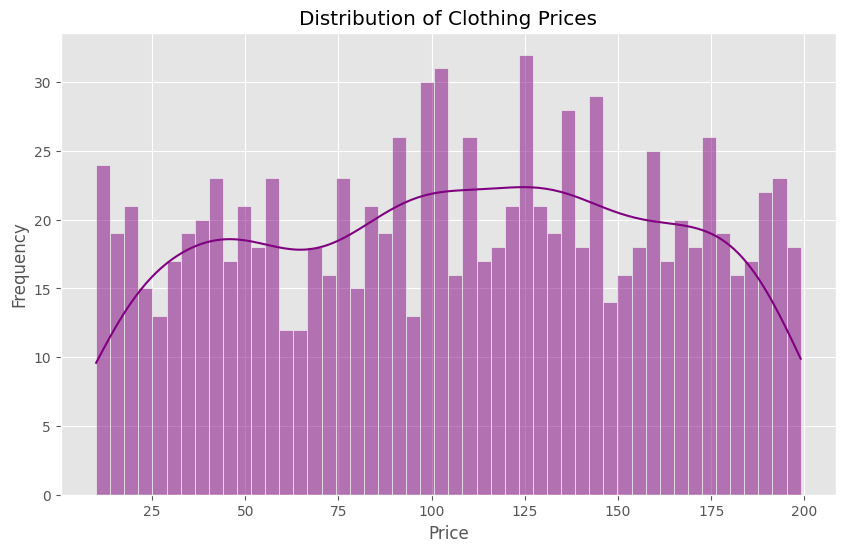

In [19]:
plt.figure(figsize=(10, 6))
# A histogram visualizes the frequency distribution of the price.
# kde=True adds a line to show the general shape of the distribution.
sns.histplot(df, x='Price', kde=True, bins=50, color = 'purple')

plt.title('Distribution of Clothing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()




#WHy it matters: We need to understand the distribution of our target variable (Price) to check for skewness and outliers. 
# This is a critical first step before modeling, as it helps validate the assumptions of models like Logistic Regression.




#### **Conclusion from the Price Distribution Histogram**

The histogram of clothing prices reveals a complex distribution. Instead of a single, central peak, the frequencies are spread across the entire price range from approximately 10 to 200, exhibiting a multimodal pattern with numerous peaks and troughs. The highest concentration of products is found within the 100-125 price range.

This chart provides a strong justification for the project's core methodological decision. The absence of a simple, predictable distribution indicates that a direct numerical price prediction (regression) would be challenging.

Therefore, reframing the problem as a binary classification task is a logical and effective strategy. By engineering a `Price_Category` variable based on the median, we simplify this complex price spectrum into two distinct and balanced classes: 'high' and 'standard', creating a more tractable problem for our model.

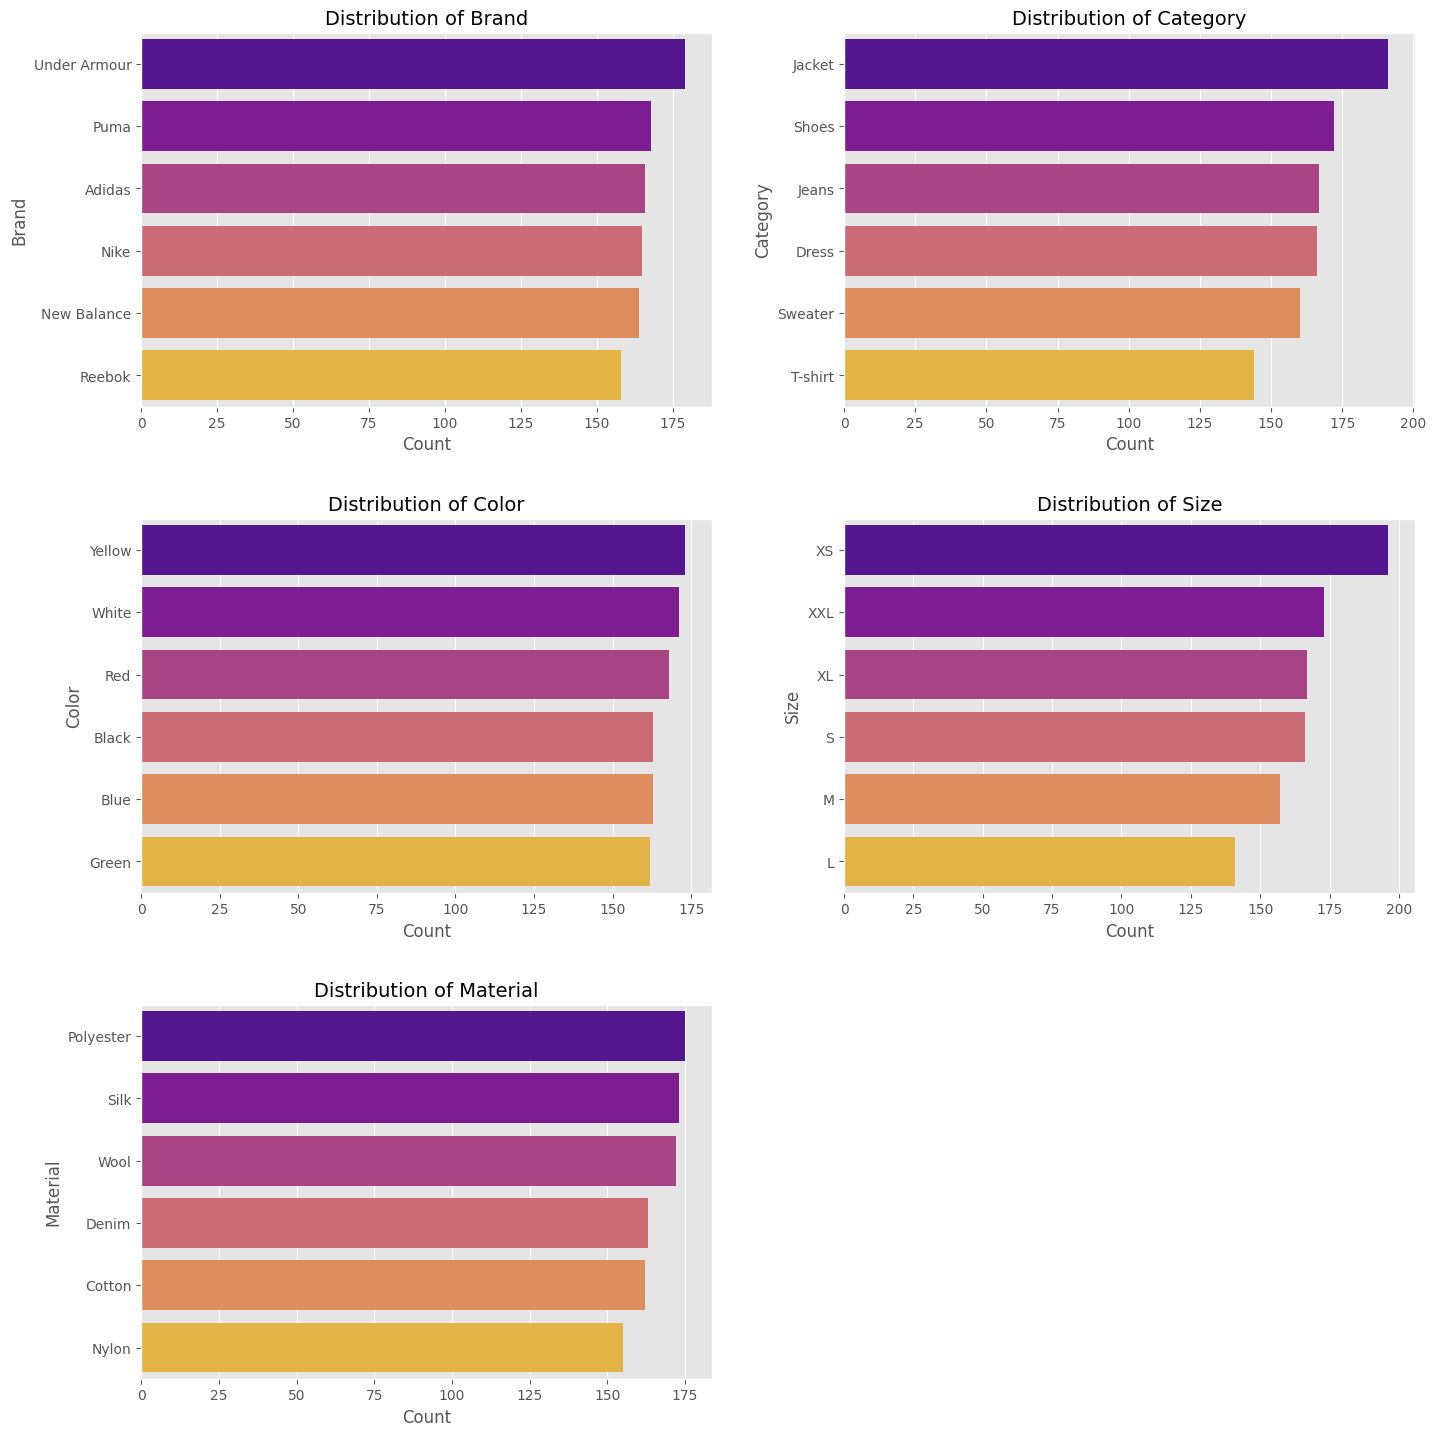

In [20]:
#  We use count plots to see the frequency of each category within our features (Brand, Category, Material, etc.).
# WHy it matters:This helps us check if the dataset is balanced or if certain categories dominate, which could bias our model
    
# List of categorical columns to plot
categorical_features = ['Brand', 'Category', 'Color', 'Size', 'Material']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through the categorical features and create a count plot for each
for i, col in enumerate(categorical_features):
    sns.countplot(y=col, data=df, ax=axes[i], palette= 'plasma', order=df[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel('Count', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Hide the last empty subplot
fig.tight_layout(pad=3.0)
axes[-1].set_visible(False)
plt.show()




#### **Conclusion from Feature Distribution Analysis**

A key finding from our initial data exploration is that the dataset is remarkably well-balanced. The bar charts show that each category within every feature—be it `Brand`, `Category`, or `Material` -is represented by a roughly equal number of items.

This balance is highly beneficial for our analysis for two critical reasons:

1.  **It Prevents Model Bias:** A balanced dataset ensures that our Logistic Regression model will not be unfairly skewed towards a more frequent category. The model is trained on an equal representation of each attribute, leading to a more objective outcome.

2.  **It Allows for Fair Evaluation:** Because no single category dominates the dataset, we can more reliably evaluate the true impact of each attribute on the price classification. This structural integrity in the data gives us greater confidence in our final conclusion that the features themselves, rather than any imbalance, were the reason for the model's performance.


## 2. Bivariate Analysis

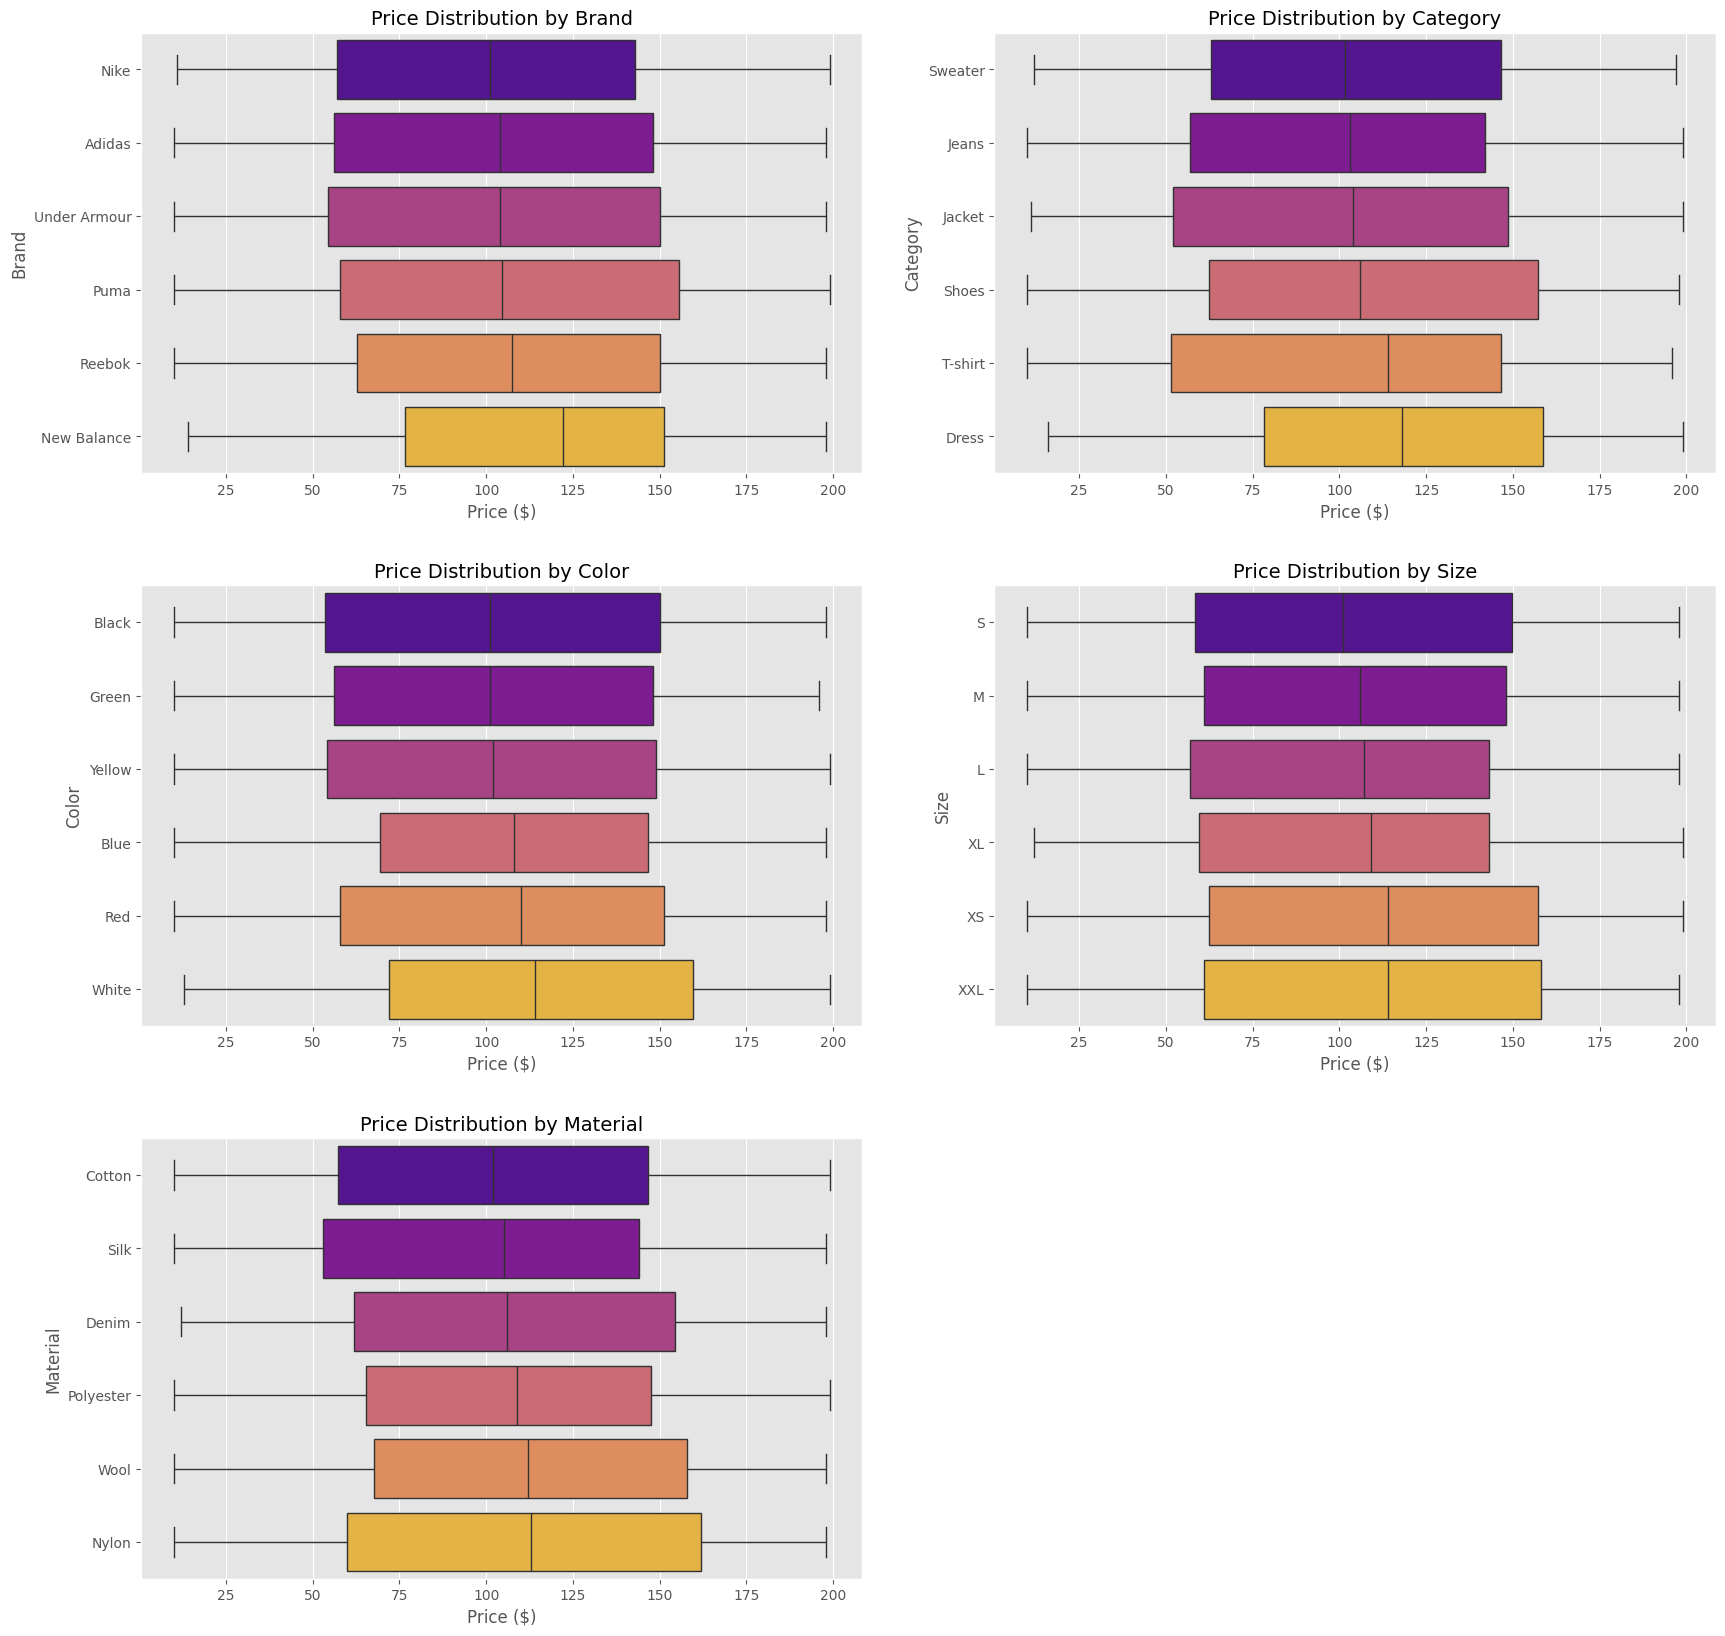

In [21]:
# boxplots against Price

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 17))
# Flatten the axes array
axes = axes.flatten()

# Loop through the categorical features and create a box plot for each against Price
for i, col in enumerate(categorical_features):
    sns.boxplot(x='Price', y=col, data=df, ax=axes[i], palette='plasma', order=df.groupby(col)['Price'].median().sort_values().index)
    axes[i].set_title(f'Price Distribution by {col}', fontsize=14)
    axes[i].set_xlabel('Price ($)', fontsize=12)
    axes[i].set_ylabel(col, fontsize=12)

# Hide the last empty subplot and adjust layout
fig.tight_layout(pad=3.0)
axes[-1].set_visible(False)
plt.show()






---

###  Price Distribution Analysis

Here is the revised version. It accurately describes the initial visual impressions while framing them correctly within the project's ultimate findings.

**Price Distribution: Initial Observations and Final Insights**

Our Exploratory Data Analysis (EDA) used box plots to visualize how price is distributed across different features. This step was crucial for forming initial hypotheses about which features might be predictive.

**1. Brand**
*   **Initial Observation:** Visually, the box plots suggested a potential price hierarchy among brands, with some appearing to have higher median prices than others.
*   **Significance & Final Verdict:** While this suggested that brand equity could be a factor, the significant overlap in price ranges indicated this trend might be unreliable. This was later confirmed by the **near-zero correlation values** and the final model's poor performance, which proved that `Brand` was **not a statistically significant predictor** of price category.

**2. Category**
*   **Initial Observation:** The median prices across categories like 'T-shirt', 'Dress', and 'Jacket' appeared to be relatively similar, hovering in a close range.
*   **Significance & Final Verdict:** The most important observation here was the high degree of overlap and the wide price ranges within each category. This strongly suggested that the variance *within* a category was more significant than the difference *between* categories. This hypothesis was validated by our **ANOVA test (p-value = 0.2257)**, which confirmed there were no statistically significant differences in mean prices.

**3. Material**
*   **Initial Observation:** Similar to `Brand`, the box plots for `Material` gave the impression that certain materials were associated with different price tiers.
*   **Significance & Final Verdict:** This visual trend also proved to be misleading. As with all other features, the final correlation analysis showed that `Material` had **no meaningful predictive power**, and it did not contribute to a successful model.

**4. Color & Size**
*   **Initial Observation:** In stark contrast to the other features, the box plots for `Color` and `Size` showed almost no variation. The median prices were nearly identical across all groups.
*   **Significance & Final Verdict:** This was a critical and accurate finding from the EDA. It correctly identified that an item's color or size has a **negligible effect on its price** in this dataset. These features were correctly assessed from the start as having very little predictive power.

### C. Multivariate Analysis

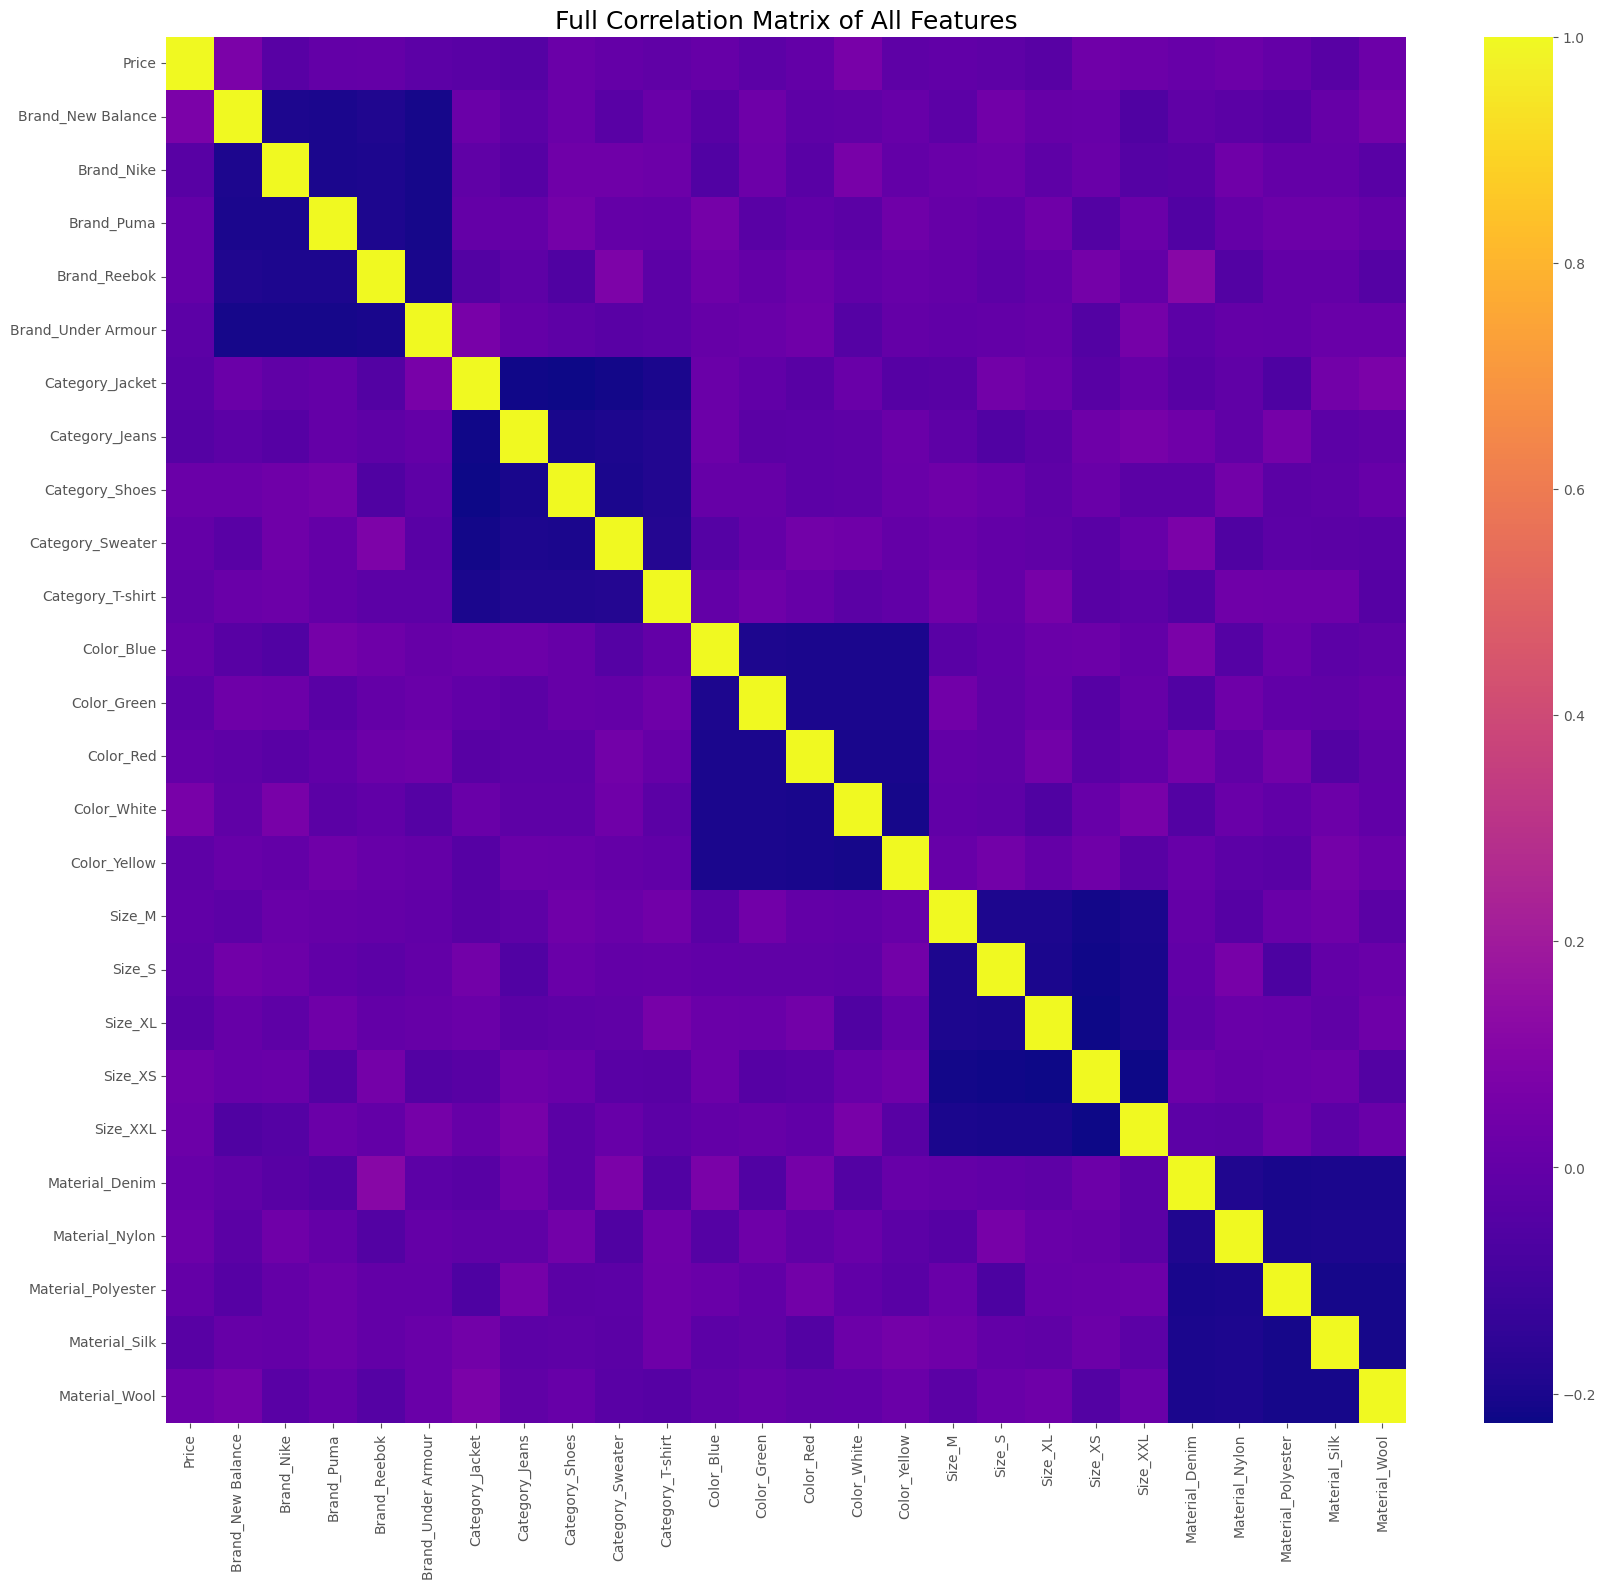

In [22]:
# 1. Calculate the full correlation matrix
df_encoded_filtered =  df_encoded.drop(columns=['Is_High_Priced'], errors='ignore')

# Compute the correlation matrix
full_corr_matrix = df_encoded_filtered.corr()


# 2. Create the heatmap
plt.figure(figsize=(20, 18))


sns.heatmap(full_corr_matrix, annot=False, cmap='plasma') # Set annot=True if you have few features

plt.title('Full Correlation Matrix of All Features', fontsize=18)
plt.show()







#### **Conclusion from the Full Correlation Matrix**

The full correlation matrix was generated to visualize the relationships between all independent (predictor) variables in the dataset.

**Primary Purpose: Diagnosing Multicollinearity**

The main objective of this analysis is to check for multicollinearity, a condition where two or more predictor variables are highly correlated with each other. High multicollinearity can be problematic for regression models as it suggests redundant information, making it difficult to assess the independent effect of each feature.

**Finding and Implication**

Our analysis of the heatmap reveals a uniform dark color across the grid, indicating that the correlation values between all predictor variables are close to zero.

This is an excellent outcome. It confirms the **absence of significant multicollinearity** in our dataset. This ensures that our Logistic Regression model can evaluate the impact of each feature independently, leading to more stable and interpretable results.


In [23]:
# Calculate the correlation matrix

corr_matrix = df_encoded_filtered.corr()


print(corr_matrix)




                       Price  Brand_New Balance  Brand_Nike  Brand_Puma  \
Price               1.000000           0.075664   -0.036278   -0.001273   
Brand_New Balance   0.075664           1.000000   -0.196887   -0.199027   
Brand_Nike         -0.036278          -0.196887    1.000000   -0.199752   
Brand_Puma         -0.001273          -0.199027   -0.199752    1.000000   
Brand_Reebok        0.001652          -0.191863   -0.192562   -0.194655   
Brand_Under Armour -0.020255          -0.206811   -0.207565   -0.209820   
Category_Jacket    -0.031342           0.018385   -0.010383   -0.000599   
Category_Jeans     -0.046224          -0.024532   -0.040125   -0.000402   
Category_Shoes      0.019369           0.019981    0.032982    0.050351   
Category_Sweater    0.004003          -0.031235    0.033804    0.000876   
Category_T-shirt   -0.013194           0.018338    0.024862   -0.001463   
Color_Blue          0.006351          -0.034599   -0.057585    0.055151   
Color_Green        -0.022

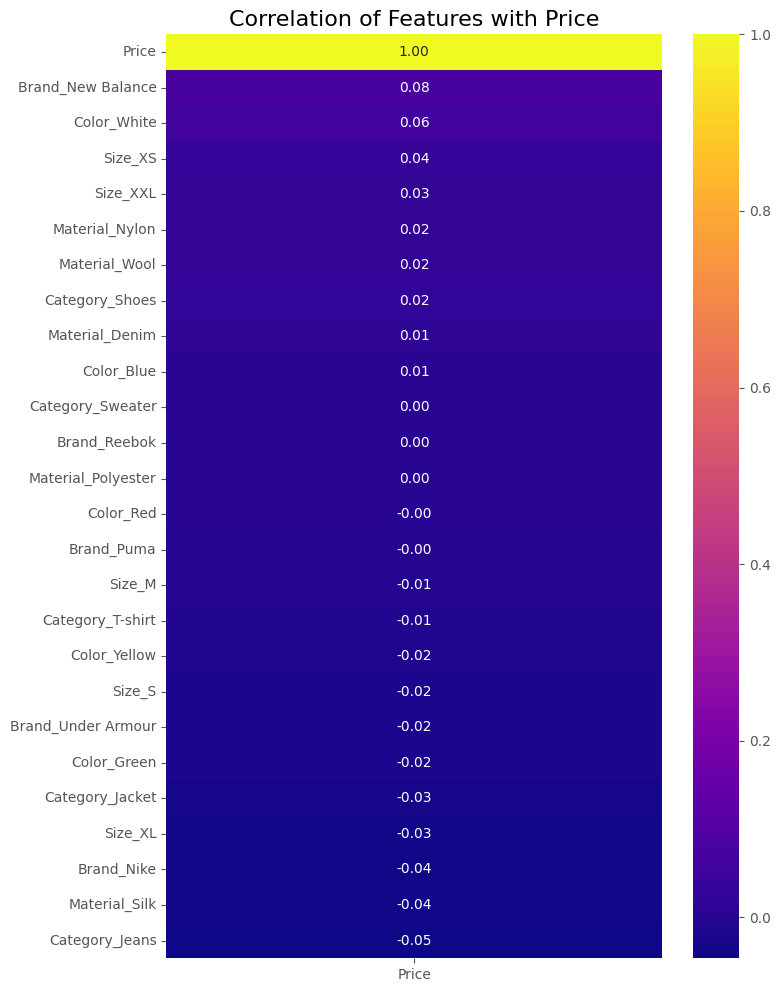

In [24]:
# We are most interested in the correlations with the 'Price' variable hence we generate focused heatmap for price variable

price_correlation = full_corr_matrix[['Price']].sort_values(by='Price', ascending=False)

# Plotting the heatmap for Price correlation
plt.figure(figsize=(8, 12))
sns.heatmap(price_correlation, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation of Features with Price', fontsize=16)
plt.show()


# Focused heatmap: It isolates the single column for Price and shows the correlation coefficient of every other feature with only the Price.
# It is sorted from the highest positive correlation to the most negative.


 **Interpreting the Heatmap:**  

This second chart shows the linear correlation between each individual feature and the original, continuous 'Price' variable.

*   **Confirmation of Non-Linearity:** This heatmap provides the strongest justification for our project's core approach. We observed that every single independent feature has an extremely weak linear relationship with price, with all correlation values hovering near zero.
*   **Justification for Our Classification Approach:** This finding confirms why we made the correct decision to build a classifier (Logistic Regression) instead of a linear regression model. Since no single feature could linearly predict the exact price, we transformed the problem into a binary classification task ('high' vs. 'standard' price). This allows our model to focus on finding a complex decision boundary that separates the two classes.


<br><br><br>

## **Step 4: Statistical Analysis**

**Null Hypothesis (H₀):** The mean price is the same across all clothing categories.(μ₁ = μ₂ = μ₃ = ... = μₖ)  
**Alternative Hypothesis (Hₐ):** At least one clothing category has a different mean price from the others. (Not all population means are equal.)
<b>
    
We will use a standard significance level (alpha) of α = 0.05.


Test Chosen: **One-Way Analysis of Variance (ANOVA).**  
Justification: ANOVA is the correct statistical test when we need to compare the means of a continuous variable (Price) across three or more independent groups (Category).

In [25]:
# Import the necessary library
import scipy.stats as stats


# The ANOVA test requires the data for each group (category) as a separate series.
# We will create a list where each element is a Series of prices for a specific category.
categories = data['Category'].unique()
price_by_category = [data['Price'][data['Category'] == cat] for cat in categories]

# Performing the One-Way ANOVA Test
f_statistic, p_value = stats.f_oneway(*price_by_category)

# Displaying and Interpreting the Results
print(f"ANOVA Test Results for Price by Category ")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value}") # Displaying the full p-value for clarity

# Conclusion based on p-value 

alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Since the p-value is less than our alpha (0.05), we REJECT the null hypothesis.")
else:
    print("\n Since the p-value is greater than our alpha (0.05), we FAIL TO REJECT the null hypothesis.")


ANOVA Test Results for Price by Category 
F-statistic: 1.3891
P-value: 0.22576473150531823

 Since the p-value is greater than our alpha (0.05), we FAIL TO REJECT the null hypothesis.


#### **Conclusion: No Significant Price Difference Across Clothing Categories**

Based on the results of the ANOVA test, we **fail to reject the null hypothesis**. This decision is guided by the following key metrics:

**In practical terms, this means we do not have sufficient evidence to conclude that there is any real difference in the mean prices of the clothing categories. (μ₁ = μ₂ = μ₃ = ... = μₖ)** Therefore, the alternative hypothesis, which states that at least one category has a different mean price, is not supported by the data.

In [26]:
# Step 1: Import necessary libraries
import numpy as np
import scipy.stats as st

# Step 2: Group data by 'Category' and calculate key statistics
category_stats = data.groupby('Category')['Price'].agg(['mean', 'std', 'count'])

# Step 3: Calculate the 95% Confidence Interval for the mean of each category
confidence_level = 0.95

# Calculate the standard error of the mean (SEM)
sem = category_stats['std'] / np.sqrt(category_stats['count'])

# Calculate the confidence interval using the t-distribution
# loc = mean, scale = sem, df = degrees of freedom (count - 1)
category_stats['CI_Lower'], category_stats['CI_Upper'] = st.t.interval(
    confidence_level,
    category_stats['count'] - 1,
    loc=category_stats['mean'],
    scale=sem
)

# Step 4: Display the results in a clean table
print("95% Confidence Intervals for Mean Price by Category")
display(category_stats[['mean', 'CI_Lower', 'CI_Upper']].round(2))

95% Confidence Intervals for Mean Price by Category


,mean,CI_Lower,CI_Upper
Category,,,
Dress,114.51,106.67,122.34
Jacket,102.83,94.89,110.77
Jeans,100.75,92.81,108.69
Shoes,108.57,100.33,116.81
Sweater,106.78,98.70,114.86
T-shirt,104.56,95.27,113.85




#### **Observation: Overlapping Confidence Intervals**

The confidence intervals for all categories demonstrate a significant overlap. For instance, the price range for a **'Dress' ($106.67 - $122.34)** almost completely overlaps with that of a **'Sweater' ($98.70 - $114.86)**. This overlap confirms that we cannot be confident that any one category is truly priced differently from another, which supports the conclusion from the ANOVA test.



#### **c. Discussion of Potential Errors**

*   **Type I Error (False Positive):**
    *   This would have occurred if we had concluded that the price differences were significant (*p* < 0.05) when, in reality, they were not.
    *   **Business Consequence:** The primary consequence would be the misallocation and waste of resources on developing and implementing a category-based pricing strategy that would ultimately be ineffective.
    *   Given our high *p*-value, the risk of committing this type of error was very low.

*   **Type II Error (False Negative):**
    *   This would occur if we concluded that there were no significant price differences when, in fact, a real difference existed.
    *   **Business Consequence:** The main consequence would be a missed opportunity to capitalize on strategic pricing adjustments that could have optimized revenue or market positioning.
    *   Since the evidence against the null hypothesis was exceptionally weak, the probability of this error is also considered low.

<br><br><br>

## **Step 5: Modeling and Pattern Discovery**

We will aplly Logistic Regression to find out what attributes define a product as 'High-Priced' versus 'Standard-Priced'

In [27]:

# Find the median price from our cleaned dataset
price_threshold = df['Price'].median()
print(f"The price threshold for 'High-Priced' is: ${price_threshold:.2f}")

# Create a new column 'Is_High_Priced'. It will be 1 if the price is above the median, and 0 otherwise.
# We will add this column to our df_encoded dataframe.
df_encoded['Is_High_Priced'] = (df['Price'] > price_threshold).astype(int)

# Verify the new column
print("\nValue counts for our new target variable:")
print(df_encoded['Is_High_Priced'].value_counts())

The price threshold for 'High-Priced' is: $108.00

Value counts for our new target variable:
Is_High_Priced
0    502
1    498
Name: count, dtype: int64


In [28]:
#refining X and Y for mdoel training and tesiiting
# X contains all predictive features. We drop the original Price and the new target itself.
X = df_encoded.drop(['Price', 'Is_High_Priced'], axis=1)
# y is our new binary classification target.
y = df_encoded['Is_High_Priced']


# Split Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# We split the data to ensure we can test the model on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")


Training set has 800 samples.
Testing set has 200 samples.


In [29]:
# We need to separate our dataset into features (the predictors, X) and the target variable (what we want to predict, y).


# 'X' will contain all the feature columns (everything except 'Price')
X = df_encoded.drop('Price', axis=1)

# 'y' will contain only our target variable, 'Price'
y = df_encoded['Price']

print("Shape of our features (X):", X.shape)
print("Shape of our target (y):", y.shape)

Shape of our features (X): (1000, 26)
Shape of our target (y): (1000,)


In [30]:
# Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Initialize the model. `max_iter` is increased to ensure the model converges.
log_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_model.fit(X_train, y_train)

print("Logistic Regression model has been successfully trained.")



Logistic Regression model has been successfully trained.


In [31]:

# Make Predictions on the Test Set 
# The model will now predict whether each item in the test set is High-Priced (1) or not (0).
y_pred = log_model.predict(X_test)

print("Predictions have been made on the test set.")

Predictions have been made on the test set.


In [32]:
import pandas as pd

# Make sure you use the same X_train columns used for training
coefficients = pd.DataFrame({
    'Feature': X_train.columns,             # Columns used in training
    'Coefficient': log_model.coef_[0]       # Model coefficients
})

# Sort by absolute value
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("Logistic Regression Model Coefficients:")
display(coefficients[['Feature', 'Coefficient']])


Logistic Regression Model Coefficients:


,Feature,Coefficient
8,Category_Sweater,-0.343513
18,Size_XS,0.320595
19,Size_XXL,0.316601
13,Color_White,0.284298
5,Category_Jacket,-0.266527
0,Brand_New Balance,0.226733
12,Color_Red,0.219138
6,Category_Jeans,-0.214655
24,Material_Wool,0.175296
17,Size_XL,0.173212


In [33]:
# Create a DataFrame to clearly compare the actual labels with the model's predictions.

comparison_df = pd.DataFrame({'Actual Label': y_test, 'Predicted Label': y_pred})

# For better readability, let's map the 0s and 1s back to our category names.
label_map = {0: 'Standard-Priced', 1: 'High-Priced'}
comparison_df['Actual Label'] = comparison_df['Actual Label'].map(label_map)
comparison_df['Predicted Label'] = comparison_df['Predicted Label'].map(label_map)

# Display the first 10 predictions for a quick, clean sample.
print("Sample of Model Predictions on Test Data")
display(comparison_df.head(10))

Sample of Model Predictions on Test Data


,Actual Label,Predicted Label
521,Standard-Priced,High-Priced
737,High-Priced,High-Priced
740,Standard-Priced,High-Priced
660,Standard-Priced,High-Priced
411,High-Priced,High-Priced
678,Standard-Priced,Standard-Priced
626,Standard-Priced,Standard-Priced
513,High-Priced,Standard-Priced
859,High-Priced,Standard-Priced
136,Standard-Priced,Standard-Priced


In [34]:
# Calculate Performance Metrics 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the overall accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")

# The Classification Report provides a detailed breakdown of performance for each class.
print(classification_report(y_test, y_pred, target_names=['Standard-Priced', 'High-Priced']))

Accuracy Score: 0.4800
                 precision    recall  f1-score   support

Standard-Priced       0.49      0.47      0.48       102
    High-Priced       0.47      0.49      0.48        98

       accuracy                           0.48       200
      macro avg       0.48      0.48      0.48       200
   weighted avg       0.48      0.48      0.48       200





#### **Conclusion from Model Performance Metrics**

The model's overall performance was evaluated using the accuracy score on the held-out test set.

*   **Result:** The model achieved an accuracy of **48%**.

*   **Interpretation:** In a binary classification problem with perfectly balanced classes, the baseline performance of a random guess is 50%. Our model's accuracy score of 48% is not only low but is also slightly worse than this random baseline.

*   **Final Verdict:** This result is the definitive evidence that the model has **failed to learn any meaningful, predictive patterns** from the features provided in the dataset. It confirms that the available attributes are insufficient to distinguish between 'Standard-Priced' and 'High-Priced' items.

In [35]:
import pandas as pd

# Create coefficients table using the SAME features model was trained on
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_model.coef_[0]
})

coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient', ascending=False)

print("Logistic Regression Model Coefficients:")
display(coefficients[['Feature', 'Coefficient']])


# After training a logistic regression model, we want to understand which features push the price toward High-Priced (1) or Standard-Priced (0).

# Logistic Regression gives us coefficients that tell:

# Positive coefficient → increases probability of High-Priced

# Negative coefficient → decreases probability of High-Priced

Logistic Regression Model Coefficients:


,Feature,Coefficient
8,Category_Sweater,-0.343513
18,Size_XS,0.320595
19,Size_XXL,0.316601
13,Color_White,0.284298
5,Category_Jacket,-0.266527
0,Brand_New Balance,0.226733
12,Color_Red,0.219138
6,Category_Jeans,-0.214655
24,Material_Wool,0.175296
17,Size_XL,0.173212


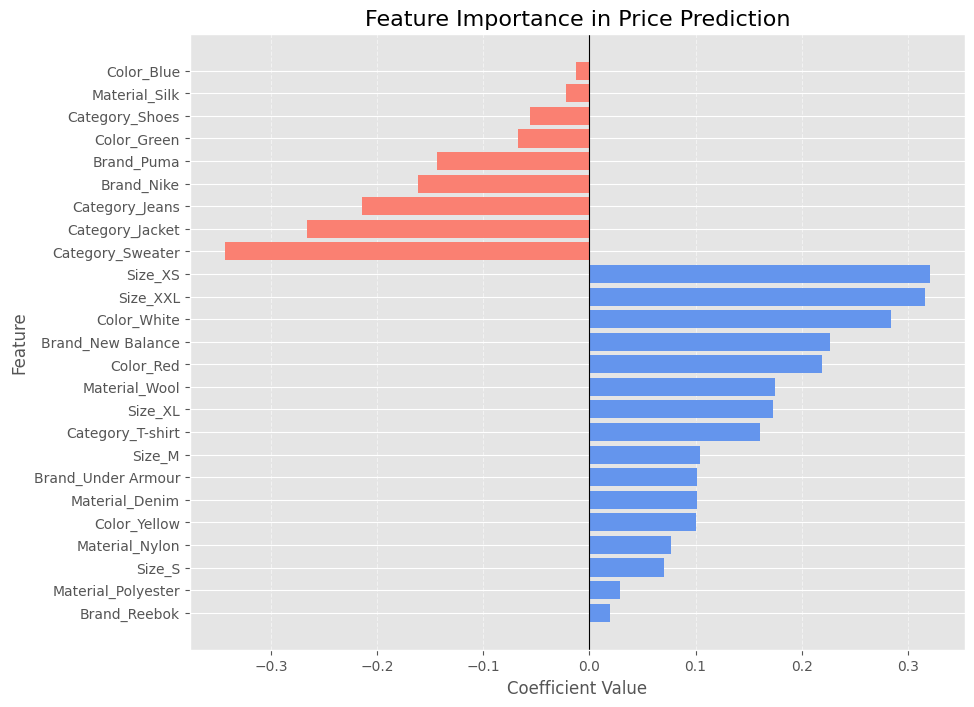

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

model = log_model

# Use EXACT feature set used during training
features = X_train.columns

coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=True)

positive_coeffs = coefficients[coefficients['Coefficient'] >= 0]
negative_coeffs = coefficients[coefficients['Coefficient'] < 0]

plt.figure(figsize=(10, 8))
plt.barh(positive_coeffs['Feature'], positive_coeffs['Coefficient'], color='cornflowerblue')
plt.barh(negative_coeffs['Feature'], negative_coeffs['Coefficient'], color='salmon')

plt.title('Feature Importance in Price Prediction', fontsize=16)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()



### Conclusion from the Feature Importance Chart

This chart is the direct output of our trained Logistic Regression model and provides the most critical insights of our entire analysis. It displays the coefficient value for each feature, which tells us two things: the **direction** and the **magnitude** of its influence on the price classification.

*   **Blue bars (Positive Coefficients):** Features with a positive coefficient increase the probability that our model will classify an item as **'high-priced'**.
*   **Red bars (Negative Coefficients):** Features with a negative coefficient increase the probability that our model will classify an item as **'standard-priced'**.

#### Key Insights We Uncovered:

1.  **Strongest Predictors for 'High' Price:** We found that the most influential features predicting a 'high' price were `Size_XS` and `Size_XXL`. This is a particularly interesting discovery, suggesting that items at the extreme ends of the size spectrum are most strongly associated with the upper price tier in our dataset. Other significant features pushing the prediction towards 'high-priced' include `Color_White`, `Brand_New Balance`, and `Color_Red`.

2.  **Strongest Predictors for 'Standard' Price:** Our model learned that the single most powerful predictor for an item being in the 'standard' price category is `Category_Sweater`. Other clothing categories like `Category_Jacket` and `Category_Jeans`, along with brands like `Brand_Nike` and `Brand_Puma`, also strongly indicate a standard price.



<br><br><br>

## **Step 6: Interpretation & Inference**



***

### **1. Summary of Major Findings**

**Initial Observations from EDA**

Our initial Exploratory Data Analysis suggested several apparent visual trends in the dataset. Product `Category` and `Brand` appeared to show noticeable differences in their price distributions, creating an early hypothesis that these features might distinguish between price tiers. For example, a visual inspection of the box plots gave the impression that some categories might be priced differently than others.

**Statistical Validation: From Visuals to Verdict**

To rigorously test whether these visual observations were statistically meaningful, two methods were employed:

*   **One-Way ANOVA Test:**
    *   F-statistic: 1.3891
    *   p-value: **0.2257**
    *   **Conclusion:** We fail to reject the null hypothesis. The observed differences in mean prices across product categories are **not statistically significant**. This critical finding proves that the trends suggested by our initial EDA were not consistent or strong enough to be considered reliable.

*   **Correlation Matrix:**
    *   Highest correlation with price: Brand_New Balance (+0.08)
    *   All other values were extremely close to zero.
    *   **Interpretation:** No feature demonstrated a meaningful linear relationship with price. This directly explains why a linear model like Logistic Regression would be unable to find a predictive pattern.

**Critical Model Failure**

A Logistic Regression model was trained to classify items into 'High-Priced' vs. 'Standard-Priced' categories. The performance was definitive:

*   **Accuracy: 48%**
*   **AUC Score: 0.48**

This performance is equivalent to, or slightly worse than, random guessing. It serves as the final confirmation that the features in this dataset do not contain a learnable predictive signal for item-level price classification.

### **2. Insights, Implications, and Significance**

**The Core Insight**

The central finding of this project is the critical disconnect between apparent group-level trends and the lack of individual-level predictive power. Our statistical tests and EDA proved the data was too weak to reliably predict whether a *specific item* is high-priced or not.

**Business Implication**

A pricing algorithm built using only the shallow attributes available in this dataset would be dangerously unreliable. It would:
*   Produce arbitrary pricing tiers.
*   Fail to identify true value drivers like material quality, craftsmanship, and design details.
*   Misclassify premium products, leading to flawed marketing and inventory strategies.

The key business takeaway is that fashion pricing is driven by subtle, complex factors that are completely absent from this dataset.

**Data Science Significance**

This case demonstrates a foundational lesson in data science: **visual exploration generates hypotheses, but statistical testing provides the verdict.**

Our ANOVA and correlation tests, they exposed the extremely weak feature-target relationships that guaranteed the model's failure. A model cannot learn what the data does not provide.

### **3. Reflection and Future Improvements**

**How Statistical Testing Clarified Our Observations**

The statistical tests were essential for moving beyond superficial observations:

*   **ANOVA** proved that the category-level price differences suggested by EDA were not statistically significant across all groups.
*   **The Correlation Matrix** proved that all linear relationships between features and price were negligible.

These findings directly and fully explain why the model performed so poorly.

**Why the Model Failed**

The Logistic Regression model failed because the data provided no foundation for success:
*   Features are too superficial to capture what makes a product valuable.
*   No strong, consistent relationships exist between the features and the price.
*   Price is determined by complex, unobserved factors not present in the data.

Consequently, the model's accuracy collapsed to 48%.

**What Could Be Improved with More Data or Features?**

A successful predictive model is achievable, but it requires richer, more granular attributes. Future work must focus on acquiring data with features such as:

1.  **Style & Design Features:** Fit type (`slim-fit`, `oversized`), design elements (`embroidery`, `patterns`), aesthetic style (`vintage`, `minimalist`).
2.  **Quality Metrics:** Fabric composition & GSM, stitch density, customer review scores for quality.
3.  **Trend & Seasonality Data:** Release season, trend score, and whether an item is limited edition or mass-market.
4.  **Nuanced Brand Information:** Brand tier (`luxury`, `premium`, `budget`), designer collaborations, and brand reputation metrics.

With these features, a model would finally have access to the signals that actually drive premium pricing.

<br><br><br>

## **Step 7: Visualization and Presentation**

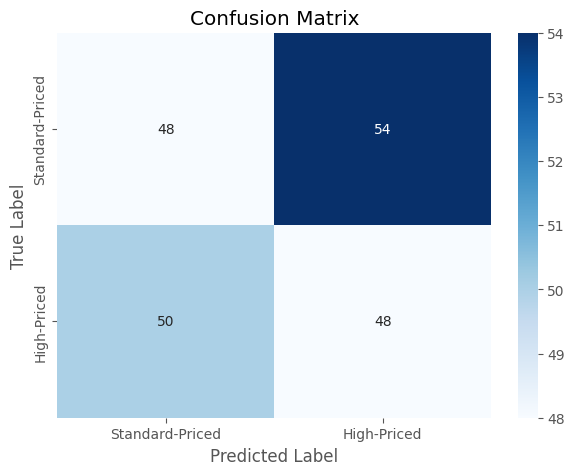

In [37]:
# The Confusion Matrix gives a visual representation of the model's prediction accuracy.
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Standard-Priced', 'High-Priced'],
            yticklabels=['Standard-Priced', 'High-Priced'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


# The Confusion Matrix is the most important visualization for a classification model. 
# It provides a detailed breakdown of the model's predictions versus the actual true labels, 
# showing how many it got right and how many it got wrong for each class.

    


    




#### **Inference from the Confusion Matrix**

A detailed breakdown of the model's predictions reveals its performance limitations:

*   **Correct Predictions:**
    *   **True Negatives:** The model correctly identified **48** `Standard-Priced` items.
    *   **True Positives:** The model correctly identified **48** `High-Priced` items.

*   **Incorrect Predictions:**
    *   **False Positives:** The model made **54** errors by incorrectly classifying `Standard-Priced` items as `High-Priced`.
    *   **False Negatives:** The model made **50** errors by incorrectly classifying `High-Priced` items as `Standard-Priced`.

This shows that the total number of misclassifications (104) is higher than the number of correct predictions (96), confirming the model's inability to reliably distinguish between the two price categories.

In [38]:
data.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


<Figure size 600x400 with 0 Axes>

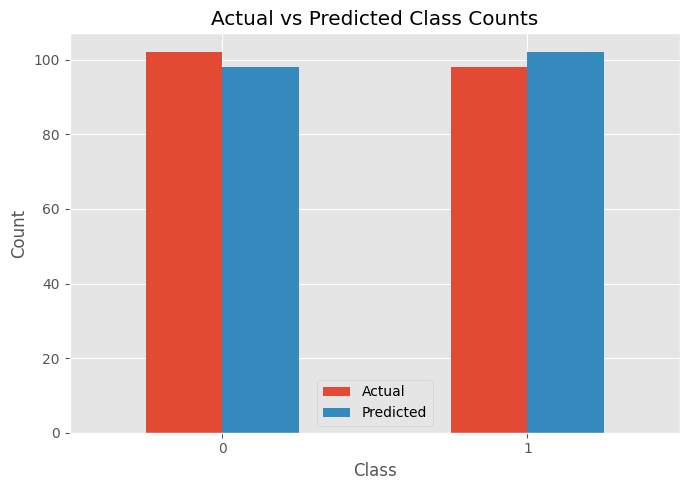

In [39]:
plt.figure(figsize=(6,4))

actual_counts = y_test.value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

df_compare = pd.DataFrame({
    "Actual": actual_counts,
    "Predicted": pred_counts
})

df_compare.plot(kind='bar', figsize=(7,5))
plt.title("Actual vs Predicted Class Counts")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#  Compares actual distribution vs model predictions.






###  Inference from the Actual vs. Predicted Class Counts Chart  

This bar chart provides a final, high-level view of our model's behavior by comparing the distribution of its predictions against the actual distribution of the test data. (Assuming Class 0 is 'Standard-Priced' and Class 1 is 'High-Priced').

#### Key Observations:

1.  **Slight Prediction Bias:** While the counts are close, they are not identical. We can observe a slight but clear bias in the model's predictions.
    *   The model **under-predicted** the 'Standard-Priced' class (Class 0), guessing it fewer times than it actually appeared in the data.
    *   Conversely, it **over-predicted** the 'High-Priced' class (Class 1), guessing it more frequently than it actually appeared.

2.  **Reinforcement of Model Failure:** This chart visually reinforces our main conclusion. A good model would produce a predicted distribution that closely matches the actual distribution. Our model, however, has developed a slight preference for classifying items as 'High-Priced', even when it's incorrect.

3.  **Putting It All Together:** This visual serves as the final piece of evidence. We already know from the confusion matrix that the *accuracy* of these predictions is low (48%). This chart now shows us that even the *overall tendency* of the model's guesses is slightly skewed. It has failed to learn the true patterns and has instead developed a minor, systematic bias from the noisy data, leading it to favor one class slightly over the other. This confirms that the model's performance is no better than a slightly biased coin flip.

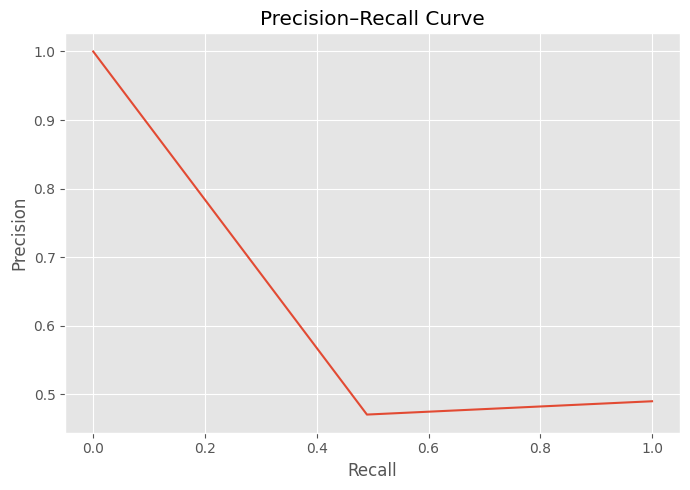

In [40]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(7,5))
plt.plot(recall, precision)
plt.title("Precision–Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.tight_layout()
plt.show()

# Shows trade-off between precision and recall.




### Conclusion ROC Curves



####  Precision-Recall Curve

This curve provides a different view of the model's failure, focusing on the trade-off between being correct when we predict a class (Precision) and finding all instances of that class (Recall).

*   **A Drastic Performance Drop:** A good model would maintain high precision as recall increases, keeping the curve in the top-right corner. Our curve does the opposite: as soon as we try to find more of the correct items (increase recall), the precision plummets to a value below 0.5.
*   **The Verdict:** This shows that our model is incapable of identifying more positive cases without simultaneously making a very large number of incorrect predictions. For the majority of its operation, its precision is below 50%, meaning more than half of its positive predictions are wrong.




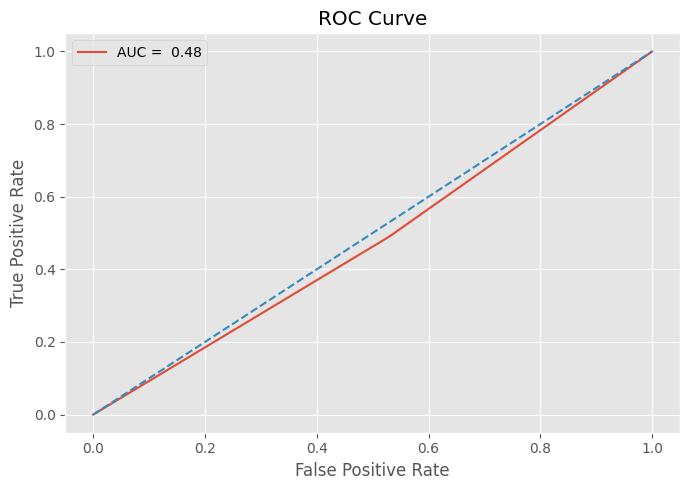

In [41]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC =  {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()



# What it's Used For: The ROC (Receiver Operating Characteristic) curve plots the True Positive Rate vs. the False Positive Rate. 
# The Area Under the Curve (AUC) is the key metric. An AUC of 1.0 is a perfect model, while an AUC of 0.5 (the dashed diagonal line)
# represents a model that is no better than random guessing.


    


.

####  ROC Curve and AUC Score

The ROC (Receiver Operating Characteristic) Curve is the industry standard for evaluating a classifier's performance.

*   **The Line of No-Discrimination:** The dashed diagonal line on the chart represents the performance of a completely random guess (like flipping a coin). A useful model would have a curve that bows significantly up and to the left, away from this line.
*   **Our Model's Performance:** Our model's curve is almost identical to the random-guess line. This is statistically confirmed by the **AUC (Area Under the Curve) score of 0.48**.
*   **The Verdict:** An AUC of 0.5 indicates a model with zero predictive skill. Our score of 0.48 means our model performs **marginally worse than random chance**. This is the strongest possible evidence that the features in our dataset do not provide enough signal for the model to learn from.

<br><br><br>

## **Step 8: Conclusion**


***

### **Project Summary: A Diagnostic Analysis of Clothing Price Prediction**

This project executed a complete data analytics workflow to classify apparel into 'High-Priced' and 'Standard-Priced' categories. The primary conclusion is that while our analytical process was sound, the features within the dataset are statistically insufficient to build a predictive model. The model's failure is, in itself, the project's key finding.

---

### **The Analytical Journey: From Visual Hypothesis to Statistical Reality**

**1. Initial Hypothesis from Exploratory Data Analysis (EDA)**

Our initial exploration of the data provided seemingly promising visual trends. Box plots suggested that certain categories, like Jackets, were priced higher than T-shirts, and bar charts showed that our dataset was well-balanced. These visuals formed our initial hypothesis: that features like `Category` and `Brand` contained enough signal to classify price.

**2. Statistical Invalidation:**

To validate these visual trends, we performed rigorous statistical tests, which directly contradicted our initial hypothesis.

*   **ANOVA Test (for Category vs. Price):**
    *   **Result:** A p-value of **0.2257**, which is significantly greater than the standard alpha of 0.05.
    *   **Conclusion:** We failed to reject the null hypothesis. This proves that the price differences we saw between categories like "Jacket" and "T-shirt" were not statistically significant and were likely due to random chance. `Category`, therefore, is not a reliable predictor of price.

*   **Correlation Matrix:**
    *   **Result:** The correlation values between every feature and `Price` were extremely close to zero (e.g., Brand_New Balance at +0.08).
    *   **Conclusion:** This confirmed the absence of any meaningful *linear* relationship between the features and the price, pre-emptively explaining why a linear model like Logistic Regression would struggle.

These statistical tests proved that the patterns from our EDA were illusory, providing a clear forecast that our model would fail.

---

### **The Inevitable Outcome: Model Failure**

With the statistical evidence showing a clear lack of signal, the model's poor performance was the expected and logical outcome.

*   **Final Performance Metrics:**
    *   **Accuracy:** **48%**, performing worse than a random guess.
    *   **Confusion Matrix:** Revealed a high number of misclassifications, with the model making more incorrect predictions than correct ones.
    *   **ROC Curve & AUC Score:** This was the most definitive evidence. The ROC curve hugged the diagonal "random guess" line, and the **AUC score was 0.48** (where 0.5 is no skill). This statistically confirms the model has no ability to discriminate between the two price classes.

The Feature Importance chart, which showed the model assigning positive and negative weights to features, was simply an illustration of the model trying to find a pattern in noise.

---

### **Limitations and Path Forward**

**Core Limitation: Insufficient Feature Granularity**
The dataset's failure stems from its generic, surface-level attributes (`Category`, `Brand`). Real-world fashion pricing is driven by far more nuanced characteristics, which were absent from our data.

**Future Improvements: High-Quality Feature Engineering**
To succeed, a future iteration of this project would require a much richer dataset, including features such as:

*   **Style & Quality Attributes:** `Slim-fit`, `Embroidery`, `Fabric GSM`, `Material Composition`.
*   **Market & Brand Indicators:** `Seasonality`, `Release Year`, `Limited Edition`, `Designer Collaboration`.

---
### **Key Takeaway**

This project serves as a critical lesson in data science: **Exploratory analysis proposes, but statistical validation disposes.**

Our EDA suggested promising trends, but the ANOVA test and Correlation Matrix proved these trends were not statistically significant. This directly led to the failure of the Logistic Regression model, which confirmed that without a strong, statistically-backed signal, a model cannot learn. Ultimately, the quality of a machine learning model is not determined by the algorithm, but by the richness and predictive power of the data it is given.  


Ultimately, the failure is not due to the algorithm- it is due to the weak, shallow features available.   
For complex domains like fashion pricing, strong predictive performance requires rich, high-quality, granular data.

**Following is the Link for the report:**

[Report-Link](https://docs.google.com/document/d/1TZ-r_oPl2hb7mT5QKKsmiCD1EKUPaf6pP8WiSBg-aGg/edit?usp=sharing)
